In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import json

In [2]:
df = pd.read_csv("../data/corpus.csv")

In [3]:
subset_df = df[["article_segments", "title", "article_id"]]

In [4]:
result = []
for _, row in subset_df.iterrows():

    row_obj = json.loads(row["article_segments"])

    for paragraph in row_obj["paragraphs"]:
        for sentence in paragraph:
            result.append((row["article_id"], row["title"], sentence["text"], sentence["label"]))

In [5]:
final_df = pd.DataFrame(result, columns=["article_id", "title", "sentence", "label"])
final_df

,article_id,title,sentence,label
0,1,"2015: Beyond Obama, new Congress, we need a re...","2015: Beyond Obama, new Congress, we need a re...",title
1,1,"2015: Beyond Obama, new Congress, we need a re...","In the film, ""Girl Interrupted,"" Winona Ryder ...",anecdote
2,1,"2015: Beyond Obama, new Congress, we need a re...",.,no-unit
3,1,"2015: Beyond Obama, new Congress, we need a re...",The year is 1967,anecdote
4,1,"2015: Beyond Obama, new Congress, we need a re...",and,no-unit
...,...,...,...,...
28767,300,Zero suicides is an admirable aim but it requi...,.,no-unit
28768,300,Zero suicides is an admirable aim but it requi...,Therapy isn't just about lying on a couch whil...,assumption
28769,300,Zero suicides is an admirable aim but it requi...,.,no-unit
28770,300,Zero suicides is an admirable aim but it requi...,It's about feeling comfortable enough to say y...,assumption


In [6]:
final_df["label"].value_counts()

no-unit          15193
assumption        9049
anecdote          2430
testimony         1064
statistics         381
title              266
common-ground      232
other              157
Name: label, dtype: int64

<AxesSubplot:>

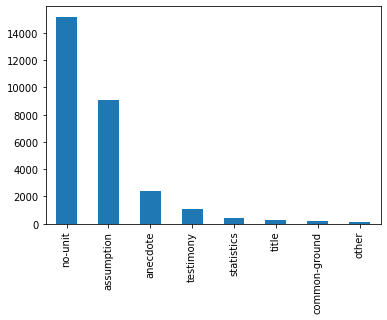

In [17]:
final_df["label"].value_counts().plot.bar()

In [8]:
filtered_df = final_df[final_df["label"] != "no-unit"]
filtered_df['label'].value_counts()

assumption       9049
anecdote         2430
testimony        1064
statistics        381
title             266
common-ground     232
other             157
Name: label, dtype: int64

<AxesSubplot:>

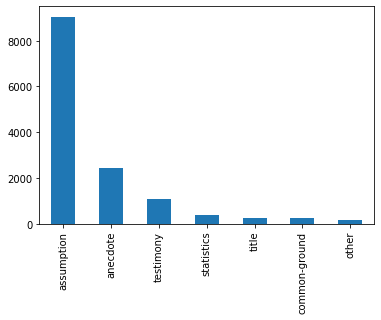

In [19]:
filtered_df["label"].value_counts().plot.bar()

In [20]:
filtered_df.to_csv("../data/corpus_filtered.csv", index=False)

In [37]:
train, rest = train_test_split(filtered_df, test_size=0.3, random_state=313)
valid, test = train_test_split(rest, test_size=1/3, random_state=313)

In [43]:
total_n = filtered_df.shape[0]
train_n = train.shape[0]
valid_n = valid.shape[0]
test_n = test.shape[0]

print("Total:", total_n)
print(f"Train: {train_n}, {train_n/total_n*100}%")
print(f"Valid: {valid_n}, {valid_n/total_n*100}%")
print(f"Test: {test_n}, {test_n/total_n*100}%")

Total: 13579
Train: 9505, 69.99779070623757%
Valid: 2716, 20.001472862508287%
Test: 1358, 10.000736431254143%


In [40]:
train.to_csv("../data/corpus_train.csv", index=False)
valid.to_csv("../data/corpus_valid.csv", index=False)
test.to_csv("../data/corpus_test.csv", index=False)